<a href="https://colab.research.google.com/github/lucguittard/Portolio-Projects/blob/master/DSproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Authorizing access to G-Drive

In [0]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Making a new df

### Reading-In and Initial Edits 

In [0]:
path = "/content/drive/My Drive/dsProject2/household-debt/household-debt-by-county.csv"
df = pd.read_csv(path)                         #2013-2017
path2 = "/content/drive/My Drive/dsProject2/Rural_Atlas_Update20/Income.csv" 
df2 = pd.read_csv(path2, encoding='latin-1')   #2018-2019
path = '/content/drive/My Drive/dsProject2/Rural_Atlas_Update20/County Classifications.csv'
df3 = pd.read_csv(path, encoding='latin-1')    #2013-2015
path4 = '/content/drive/My Drive/dsProject2/Rural_Atlas_Update20/Veterans.csv'
df4 = pd.read_csv('/content/drive/My Drive/dsProject2/Rural_Atlas_Update20/Veterans.csv', encoding='latin-1') #2018-2019
path5 = '/content/drive/My Drive/dsProject2/Rural_Atlas_Update20/People.csv'      #2010-2019
df5 = pd.read_csv(path5, encoding='latin-1')
path6 = '/content/drive/My Drive/dsProject2/Rural_Atlas_Update20/Jobs.csv'        #2018-2019
df6 = pd.read_csv(path6, encoding='latin-1') 
path9 = '/content/drive/My Drive/dsProject2/2015CountyTypologyCodes.csv'          #2013-2015
df9 = pd.read_csv(path9, encoding='latin-1')
path10 = '/content/drive/My Drive/dsProject2/creativeclass200711.csv'             #2007-2011
df10 = pd.read_csv(path10, encoding='latin-1')

In [0]:
df = df.rename(columns = {"area_fips": "FIPS"})
mask = (df['year'] > 2012)
df = df[mask]

df2 = df2.drop(0)

df3 = df3.rename(columns = {'FIPStxt': 'FIPS'})
df3 = df3[['FIPS','RuralUrbanContinuumCode2013','Low_Education_2015_update','Low_Employment_2015_update',
           'Population_loss_2015_update', 'Metro_Adjacent2013']]

df4 = df4.drop(0)
df4 = df4[['FIPS','Vets18OPct','MaleVetsPct','PctVetsPoor','PctNonVetsPoor','PctVetsDisabilty','PctNonVetsDisabilty']]

df5 = df5.drop(0)
df5 = df5[['FIPS','PopChangeRate1018','NetMigrationRate1018','PopDensity2010','Under18Pct2010','Age65AndOlderPct2010','ForeignBornPct']]

df6 = df6.drop(0)
df6 = df6[['FIPS','UnempRate2018','UnempRate2015','PctEmpChange1018','PctEmpAgriculture','PctEmpMining','PctEmpConstruction','PctEmpManufacturing',
          'PctEmpTrade','PctEmpTrans','PctEmpInformation','PctEmpFIRE','PctEmpServices','PctEmpGovt']]

df9 = df9.rename(columns = {'FIPStxt': 'FIPS'})
df9 = df9[['FIPS','Metro-nonmetro status, 2013 0=Nonmetro 1=Metro','Persistent_Poverty_2013',
           'Persistent_Related_Child_Poverty_2013','Economic_Type_Label','Economic Types Type_2015_Update non-overlapping']]

df10 = df10[['FIPS','CCShare','CCShareSE','BohShare','BohShareSE','CCShareRME','BohShareRME','metro03']]

### Merging County-lvl. Data

In [0]:
merge1 = pd.merge(df,df2, on='FIPS')
merge2 = pd.merge(merge1,df3,on='FIPS')
merge3 = pd.merge(merge2,df4, on = 'FIPS')
merge4 = pd.merge(merge3,df5, on = 'FIPS')
merge5 = pd.merge(merge4,df6, on = 'FIPS')
merge6 = pd.merge(merge5,df9, on = 'FIPS')
merge7 = pd.merge(merge6,df10, on = 'FIPS')

merge7.to_csv('/content/drive/My Drive/dsProject2/merge7.csv', index = False)
merge7.shape

NameError: ignored

## Work on full dataset

In [0]:
# Import the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import plotly.express as px
from sklearn.metrics import classification_report
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.metrics import accuracy_score

In [0]:
# contd.
!pip install category_encoders
!pip install pdpbox
import category_encoders as ce
from sklearn.metrics import r2_score
from xgboost import XGBRegressor, XGBClassifier
from sklearn.pipeline import make_pipeline
from pdpbox import pdp
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact_plot

     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 57.7MB 1.3MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=9adfda65a67fffaf0fd9733cd9acc84a5fd92619c115c94d78b29e47b69e59de
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
# contd.
!pip install eli5
from ipywidgets import interact, fixed
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 112kB 5.0MB/s 


Using TensorFlow backend.


In [0]:
# contd.
from sklearn.model_selection import cross_val_score
!pip install category_encoders
import category_encoders as ce

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest

In [0]:
dfv = pd.read_csv('/content/drive/My Drive/dsProject2/merge7.csv')
dfv = dfv.drop(columns = ['State', 'County'])

### Split + Data Wrangling


In [0]:
dfv.year.value_counts()

2014    12532
2013    12532
2015    12531
2017    12530
2016    12530
Name: year, dtype: int64

In [0]:
print(dfv.high.isna().sum())
dfv.describe() #search for outliers)

In [0]:
#holdout test set
test = dfv.query('year == 2017') 
train = dfv.query('year != 2017')

# Split train into train & val

# Split on time-series
re_train = dfv.query('year < 2016')
re_val = dfv.query('year == 2016') #val set approx. 25% of (post- test-split) dataset 
re_test = test
print(re_train.shape,re_val.shape, re_test.shape)

# or split by random
train, test = train_test_split(train, train_size = .8, random_state = 0)
train, val = train_test_split(train, train_size=0.80, random_state=1)
train.shape, val.shape, test.shape

# or use cross-validation...

(37595, 56) (12530, 56) (12530, 56)


((32080, 56), (8020, 56), (10025, 56))

In [0]:
train.isna().sum()

In [0]:
train.nunique()

In [0]:
# Wrangle the split sets -- using same fxn, one for both methods of splitting.
#  Time-based split train set still contains variability in the 'year' feature.

def wrangle(X):    
    X = X.copy()
    
    #managing outliers
    X = X.query('MedHHInc < 70000')
    X = X.query('PerCapitaInc < 45000')
    X = X.query('PovertyUnder18Pct < 40')
    X = X.query('PovertyAllAgesPct < 35')
    X = X.query('Deep_Pov_All < 18')
    
    
    #feat/engineering
    X = X.drop(columns=['high']) #column of (many) nan
    X = X.query('qtr == 4')
    
    # Drop duplicate columns --> none yet
    duplicates = []
    X = X.drop(columns=duplicates)
    
    # Drop unusable variances
    unusable_variance = ['FIPS','year','qtr']
    X = X.drop(columns=unusable_variance)
    
    #bin the y-continuous feat using qcut to account for left-ward skew
    #X['debt_class'] = pd.cut(X['low'],8,labels = False) 
    X['debt_class'] = pd.qcut((list(X['low'])), 6, labels = False)
    X = X.drop(columns = 'low')
    
    #drop any remaining rows/entries containing one or more nan
    X = X.dropna()
    
    # return the wrangled dataframe
    return X
  
def wrangle2(X):  #alternative wrangling function
    least_feats = list_feats[35:]
    X = X.copy()
    X = X.query('qtr == 4')
    X = X.drop(columns = least_feats)
    X = X.drop(columns = ['FIPS','high','year','qtr'])
    return X
  
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)
re_train = wrangle(re_train)
re_val = wrangle(re_val)
re_test = wrangle(re_test)

In [0]:
# Further engineering
train_features = train.drop(columns=[target])
re_train_features = re_train.drop(columns = [target])

# list of numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
re_numeric_features = re_train_features.select_dtypes(include='number').columns.tolist()

# series with cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()
re_cardinality = re_train_features.select_dtypes(exclude='number').nunique()

# list of categorical features w/cardinality <= 25
categorical_features = cardinality[cardinality <= 50].index.tolist() #none w/wrangle2 function; all w/cards in 1000s
re_categorical_features = re_cardinality[re_cardinality <= 10].index.tolist()

In [0]:
# Define X and y subsets
features = numeric_features + categorical_features
target = 'debt_class'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

re_X_train = re_train[re_features]
re_y_train = re_train[target]
re_X_val = re_val[re_features]
re_y_val = re_val[target]

X_test = test[features]
y_test = test[target]

### Exploratory visuals

In [0]:
train['debt_class'].value_counts() # not insignificant left-ward skew -> fix via use of qcut

0    1596
2    1478
3    1426
5    1076
1     752
4     676
Name: debt_class, dtype: int64

In [0]:
px.scatter(train, y='debt_class',x='PctEmpConstruction', color = 'debt_class', opacity = .2)

#consider q-cut method of binning

In [0]:
px.scatter(train, x="PctEmpConstruction", y="debt_class", trendline="ols", opacity = .3)

### Split Baseline + Dist Plot + Confusion Matrix

In [0]:
#baseline

y_train.value_counts(normalize=True)  #baseline = .44 (for class 1 of 5)

0    0.227870
2    0.211022
3    0.203598
5    0.153626
1    0.107367
4    0.096516
Name: debt_class, dtype: float64

In [0]:
#dist plot

hist_data = [y_train]
group_labels = ['low debt rates groupings'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

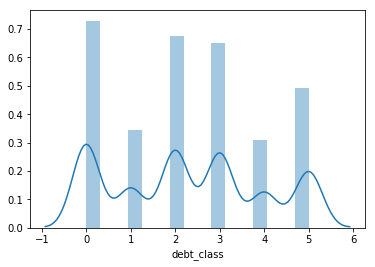

In [0]:
sns.distplot(y_train);

In [0]:
#Accuracy score for baseline
majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred) 

0.2098907418056354

In [0]:
#confusion matrix for majority class baseline
from sklearn.metrics import confusion_matrix
y_pred = pipeline.predict(X_val)
confusion_matrix(y_val, y_pred)

array([[ 62, 297,   1,   4,   1,   0],
       [  6, 359,   9,   8,   3,   0],
       [  3, 162,  15,  11,   0,   0],
       [  3, 249,  62,  55,   6,   0],
       [  0,  70,  25,  63,   3,   0],
       [  3,  46,  11, 144,  58,   0]])

In [0]:
#precision and recall for model/majority class baseline

#confusion matrix used for multi-class. types
print(classification_report(y_val, y_pred)) 

              precision    recall  f1-score   support

           0       0.81      0.17      0.28       365
           1       0.30      0.93      0.46       385
           2       0.12      0.08      0.10       191
           3       0.19      0.15      0.17       375
           4       0.04      0.02      0.03       161
           5       0.00      0.00      0.00       262

    accuracy                           0.28      1739
   macro avg       0.24      0.22      0.17      1739
weighted avg       0.30      0.28      0.21      1739



### PDP Plots

In [0]:
#begin with a fit model
gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train2, y_train)
y_pred = gb.predict(X_val2)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.10642272748906356


In [0]:
feature = 'PctEmpConstruction'
isolated = pdp_isolate(model = gb, dataset = X_val2, model_features = X_val2.columns,
                       feature =feature)

plt.rcParams['figure.dpi'] = 72
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=10)
plt.xlim(0,12)
plt.ylim(0,3);

# need to assume a class/cat approach
# interpretation: as PctEmpConstruction inc. so too does the absolute impact it has on 
# the predicted outcome 

ModuleNotFoundError: ignored

In [0]:
#PDP of Categorical feats

#drop non-cats

#define target and feats

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X_train2)

model = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
model.fit(X_encoded, y_train)

NameError: ignored

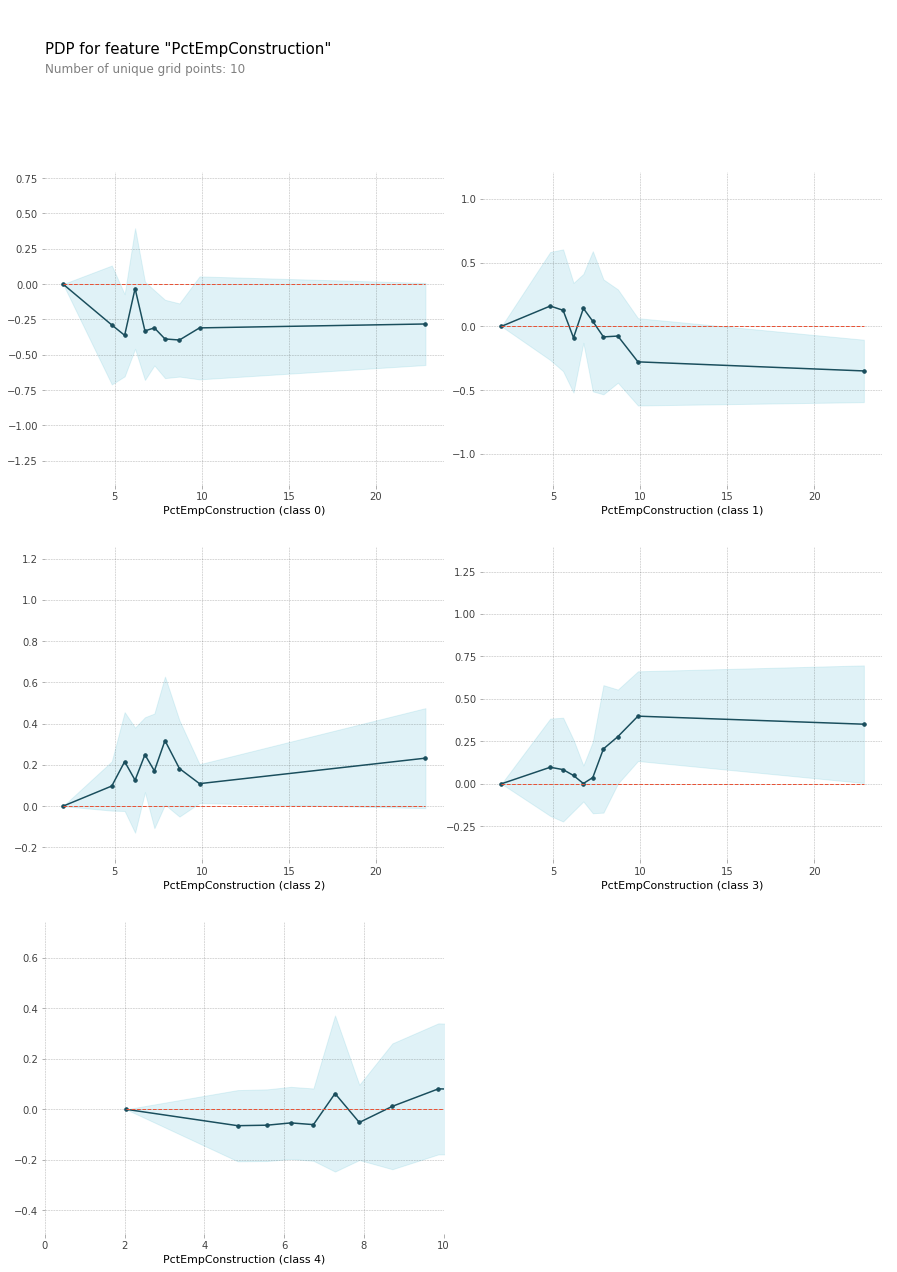

In [0]:
#Then plot via Pdpbox

feature = 'PctEmpConstruction'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features= X_train2.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature)
plt.xlim(0,10);

In [0]:
train.head()

,low,MedHHInc,PerCapitaInc,PovertyUnder18Pct,PovertyAllAgesPct,Deep_Pov_All,Deep_Pov_Children,PovertyUnder18Num,PovertyAllAgesNum,RuralUrbanContinuumCode2013,Type_2015_Update,Low_Education_2015_update,Low_Employment_2015_update,Population_loss_2015_update,Metro_Adjacent2013,Vets18OPct,MaleVetsPct,PctVetsPoor,PctNonVetsPoor,PctVetsDisabilty,PctNonVetsDisabilty,PopChangeRate1018,NetMigrationRate1018,PopDensity2010,Under18Pct2010,Age65AndOlderPct2010,ForeignBornPct,UnempRate2018,UnempRate2015,PctEmpChange1018,PctEmpAgriculture,PctEmpMining,PctEmpConstruction,PctEmpManufacturing,PctEmpTrade,PctEmpTrans,PctEmpInformation,PctEmpFIRE,PctEmpServices,PctEmpGovt,"Metro-nonmetro status, 2013 0=Nonmetro 1=Metro",Persistent_Poverty_2013,Persistent_Related_Child_Poverty_2013,Economic_Type_Label,Economic Types Type_2015_Update non-overlapping,CCShare,CCShareSE,BohShare,BohShareSE,CCShareRME,BohShareRME,metro03,debt_class
24192,0.00,46762.0,28488.0,31.8,22.1,11.325533,18.014184,39518.0,130267.0,1.0,4.0,0.0,0.0,1.0,0.0,6.012918,89.931358,19.186740,20.117272,22.567374,13.449273,-2.98,-5.85,7671.52,21.51,11.73,7.996986,5.7,7.0,4.17,0.180965,0.029501,4.422314,4.494629,10.882016,5.693748,1.940249,5.631507,58.318283,8.406787,1,1,1,Federal/State Government,4,0.23453,0.00404,0.011842,0.00076,0.00664,0.00125,1,0
55154,1.01,40353.0,21938.0,22.9,16.4,6.301327,7.211210,645.0,2031.0,6.0,4.0,1.0,0.0,1.0,1.0,9.295097,91.693635,1.782820,16.666667,41.653160,16.396243,-5.11,-5.72,13.94,25.62,15.57,4.239901,4.1,4.0,-15.40,4.771686,2.559646,3.839469,13.414441,11.423606,3.744667,0.616211,6.051509,48.380471,5.198294,0,0,0,Federal/State Government,4,0.15893,0.01979,0.008036,0.00705,0.03255,0.0116,0,1
1659,0.78,53877.0,20952.0,28.8,23.2,10.161324,11.746805,970.0,2248.0,7.0,0.0,0.0,1.0,0.0,0.0,7.196262,88.311688,21.071429,23.974164,17.142857,9.384498,4.86,-7.19,0.41,34.33,6.35,2.148141,11.6,11.0,1.14,1.099203,3.132729,3.352569,3.544930,8.189063,9.123386,0.522121,2.170926,51.250343,17.614729,0,0,0,Nonspecialized,0,0.18421,0.02519,0.00554,0.00252,0.04144,0.00415,0,1
53232,1.19,41434.0,21093.0,28.7,19.1,10.387480,18.324508,1513.0,4192.0,6.0,4.0,0.0,1.0,0.0,1.0,7.495713,95.350554,4.093567,18.825360,27.095517,13.403345,0.12,-1.25,25.83,23.59,16.13,9.450596,4.7,5.0,-12.55,3.955122,5.768359,7.026292,10.675431,12.092022,6.085675,0.487307,2.765186,43.857661,7.286945,0,0,1,Federal/State Government,4,0.14044,0.01163,0.005464,0.00324,0.01913,0.00534,0,1
31292,3.46,61592.0,26781.0,15.1,10.3,5.194633,7.838299,764.0,2315.0,1.0,0.0,0.0,0.0,0.0,0.0,9.561503,93.746278,9.189843,12.958167,20.556227,13.468331,-2.60,-2.34,41.30,24.97,14.83,0.861805,3.6,5.0,2.58,2.584662,0.452787,7.150269,17.026696,13.508160,8.489765,2.424300,3.914725,39.901896,4.546741,1,0,0,Nonspecialized,0,0.1578,0.01514,0.002801,0.0021,0.02491,0.00345,1,4


In [0]:
# can also examine encoder's mappings
encoder.mapping

#NaN always there 

[{'col': 'Economic_Type_Label',
  'data_type': dtype('O'),
  'mapping': Federal/State Government    1
  Nonspecialized              2
  Maufacturing                3
  Farming                     4
  Mining                      5
  Recreation                  6
  NaN                        -2
  dtype: int64}]

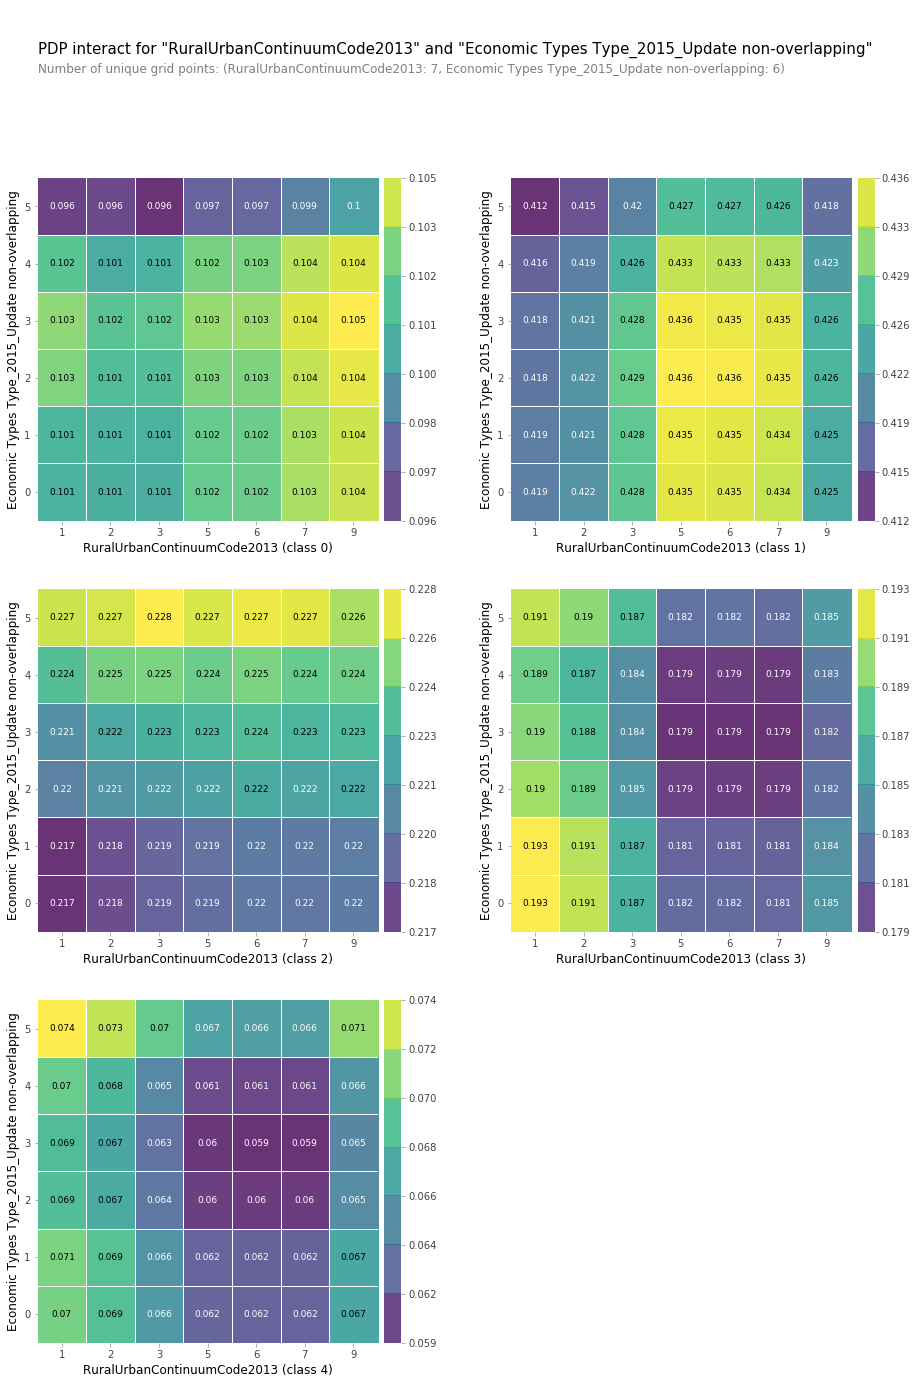

In [0]:
#Two Feat Interaction PDP table
features = ['RuralUrbanContinuumCode2013', 'Economic Types Type_2015_Update non-overlapping']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

# how two feats interact -> affecting the target-value predicted

### Feat Importance: Permutation 

In [0]:
#Permutation method via eli5 lib

# "Importance can be measured by looking at how much the score (eg. accuracy) 
#  decreases when a feature is not available."

In [0]:
# defining a model
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
    )

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# permutation and plot 
permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

#Interpreting: values at top are most important feats

# "The first number in each row shows how much model performance decreased with a random shuffling.
# The number after the ± measures how performance varied from one-reshuffling to the next.
# You'll occasionally see negative values for permutation importances. In those cases, 
# the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. 
# This happens when the feature didn't matter (should have had an importance close to 0), 
# but random chance caused the predictions on shuffled data to be more accurate. 
# This is more common with small datasets, like the one in this example, 
# because there is more room for luck/chance." source:
# https://www.kaggle.com/dansbecker/permutation-importance

#For Blog: sxn. perhaps important to reflect on the ordering here... why some feats may appear to be reversed

# Consider droping all negative values here 

Weight,Feature
0.0144 ± 0.0069,PctEmpConstruction
0.0046 ± 0.0035,Economic_Type_Label
0.0046 ± 0.0069,Vets18OPct
0.0043 ± 0.0040,PctEmpFIRE
0.0037 ± 0.0029,UnempRate2018
0.0037 ± 0.0017,PopDensity2010
0.0029 ± 0.0035,PopChangeRate1018
0.0023 ± 0.0012,Population_loss_2015_update
0.0023 ± 0.0092,NetMigrationRate1018
0.0023 ± 0.0023,PovertyAllAgesNum


### XG-BOOST

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=1, n_jobs=-1)
)
X_train2 = X_train#[['PctEmpConstruction','RuralUrbanContinuumCode2013']]
X_val2 = X_val#[['PctEmpConstruction','RuralUrbanContinuumCode2013']]
test2 = test#[['PctEmpConstruction','RuralUrbanContinuumCode2013']]
pipeline.fit(X_train2, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Economic_Type_Label'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Economic_Type_Label',
                                          'data_type': dtype('O'),
                                          'mapping': Nonspecialized              1
Recreation                  2
Federal/State Government    3
Maufacturing                4
Mining                      5
Farming                     6
NaN                        -2
dtype: int64}],
                                return_df=True, verbose=0)...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, ma

In [0]:
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))
print(pipeline.score(X_val, y_val)) # same thing

Validation Accuracy 0.4715353651523864
0.4715353651523864


In [0]:
#Avoiding Overfit via Early Stopping
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train2)
X_val_encoded = encoder.transform(X_val2)

X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((7004, 45), (1739, 45), (7004, 45), (1739, 45))

In [0]:
eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)] 

model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=8,       # try deeper trees because of high cardinality categoricals
    learning_rate=0.1, # try higher learning rate
    n_jobs=-1
)

model.fit(X_train_encoded, y_train, eval_set=eval_set, 
          eval_metric='merror', early_stopping_rounds = 10) #change after early-stop analysis -> see plot below -> b/w epochs 15&20

# classification error is reported w/each training iteration (after each boosted tree is added to the model)
# https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

[0]	validation_0-merror:0.373073	validation_1-merror:0.561817
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.33438	validation_1-merror:0.525589
[2]	validation_0-merror:0.306539	validation_1-merror:0.512938
[3]	validation_0-merror:0.289406	validation_1-merror:0.499137
[4]	validation_0-merror:0.272987	validation_1-merror:0.481886
[5]	validation_0-merror:0.258281	validation_1-merror:0.47211
[6]	validation_0-merror:0.253855	validation_1-merror:0.46981
[7]	validation_0-merror:0.242576	validation_1-merror:0.460034
[8]	validation_0-merror:0.231582	validation_1-merror:0.456009
[9]	validation_0-merror:0.2253	validation_1-merror:0.447959
[10]	validation_0-merror:0.217162	validation_1-merror:0.431857
[11]	validation_0-merror:0.21245	validation_1-merror:0.427257
[12]	validation_0-merror:0.207881	validation_1-merror:0.421507
[13]	validation_0-merror:0.203598	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

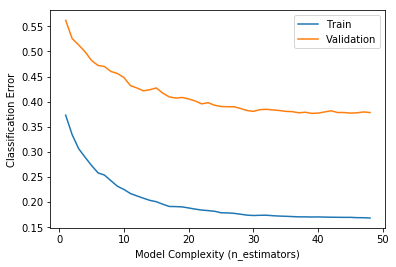

In [0]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.5, 0.61))  # Zoom in
# plt.xlim((.05,40))
plt.legend();

# Iterations
# first: consider removing parameter, allow default to run; train max-out near 90, val near 
# second: train max-out near 90, val near 1000 -> from plot, not the case. 
#         Rather, 90 does appear a decent-enough stop point to avoid overfit. 

### Shapley Values

In [0]:
!pip install shap
import xgboost
import shap
from sklearn.metrics import roc_auc_score

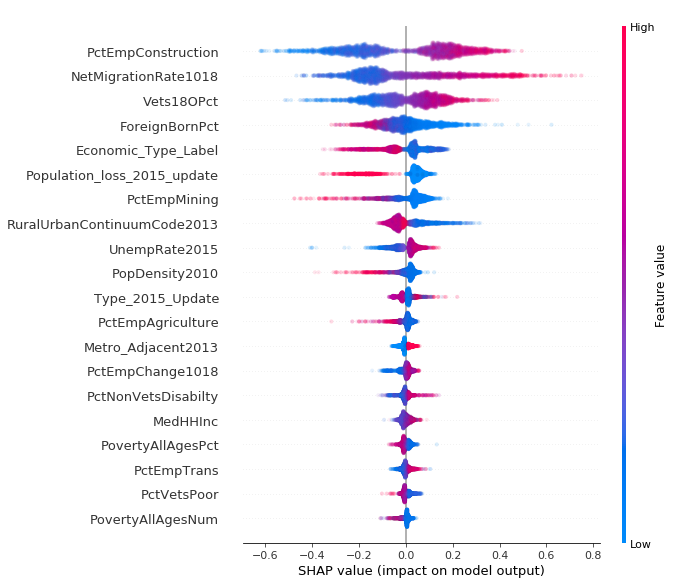

In [0]:
shap.initjs()

encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X_train)

model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_encoded, label=y_train), 100)

X_encoded = pd.DataFrame(X_encoded)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_encoded)
shap.summary_plot(shap_values, X_encoded, alpha = .05)

# with each dot representing a feature value; https://christophm.github.io/interpretable-ml-book/shapley.html

### ROC-AUC
Alter wrangling fxn for binary class.

In [0]:
#roc & auc for majority class baseline
#works with binary class. types

y_pred_proba = np.full_like(y_val, fill_value=1.00)
roc_auc_score(y_val, y_pred_proba)

ValueError: ignored

In [0]:
#roc/auc for model
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_proba) #very poor score (0.115)

ValueError: ignored

In [0]:
def set_threshold(y_true, y_pred_proba, threshold=0.5):
    """
    For binary classification problems. 
    y_pred_proba : predicted probability of class 1
    """
    
    # Apply threshold to predicted probabilities
    # to get discrete predictions
    class_0, class_1 = unique_labels(y_true)
    y_pred = np.full_like(y_true, fill_value=class_0)
    y_pred[y_pred_proba > threshold] = class_1
    
    # Plot distribution of predicted probabilities
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.title('Distribution of predicted probabilities')
    plt.show()

    # Calculate true positive rate and false positive rate
    true_positives = (y_pred==y_true) & (y_pred==class_1)
    false_positives = (y_pred!=y_true) & (y_pred==class_1)
    actual_positives = (y_true==class_1)
    actual_negatives = (y_true==class_0)
    true_positive_rate = true_positives.sum() / actual_positives.sum()
    false_positive_rate = false_positives.sum() / actual_negatives.sum()
    print('False Positive Rate', false_positive_rate)
    print('True Positive Rate', true_positive_rate)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true==class_1, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Plot point on ROC curve for the current threshold
    plt.scatter(false_positive_rate, true_positive_rate)
    plt.show()
    
    # Show ROC AUC score
    print('Area under the Receiver Operating Characteristic curve:', 
          roc_auc_score(y_true, y_pred_proba))

In [0]:
set_threshold((y_val), (y_pred_proba))

ValueError: ignored

### Pipeline + Model Val. Score

In [0]:
#pipeline time

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1)
    )

# Fit on train, score on val

pipeline.fit(X_train,y_train)
print('Validation Accuracy (random-split, top-35 feats)', pipeline.score(X_val,y_val))

pipeline.fit(re_X_train, re_y_train)
print('Validation Accuracy (time-split, top-35 feats < Wrangle)', pipeline.score(re_X_val, re_y_val)) 

# Wrangle 1 Accuracies: r-split(.774), t-split(.829)
# Wrangle 2 Accuracies: r-split(.772),t-split(.829) 
# no meaningful difference b/w cardinality < 11 and that < 51; time-based split consistently more accurate

Validation Accuracy (random-split, top-35 feats) 0.6112708453133985
Validation Accuracy (time-split, top-35 feats < Wrangle) 0.6350018268176836


In [0]:
# cross validation

from sklearn.model_selection import cross_val_score
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    )

k = 5
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='accuracy') #scoring changes w/type of model applied (cluster, class, regression)
print(f'Accuracy Score for {k} folds:', scores)

#Accuracy Score for 5 folds: [0.74448456 0.76314733 0.77550201 0.76697469 0.77099237] 

Accuracy Score for 5 folds: [0.66690391 0.67665953 0.65357143 0.6547534  0.63831308]


In [0]:
X_train.index
X_train.columns

Index(['Deep_Pov_Children', 'PovertyUnder18Num', 'PovertyAllAgesNum',
       'RuralUrbanContinuumCode2013', 'Type_2015_Update',
       'Low_Education_2015_update', 'Low_Employment_2015_update',
       'Population_loss_2015_update', 'Metro_Adjacent2013', 'Vets18OPct',
       'MaleVetsPct', 'PctVetsPoor', 'PctNonVetsPoor', 'PctVetsDisabilty',
       'PctNonVetsDisabilty', 'PopChangeRate1018', 'NetMigrationRate1018',
       'PopDensity2010', 'Under18Pct2010', 'Age65AndOlderPct2010',
       'ForeignBornPct', 'UnempRate2018', 'UnempRate2015', 'PctEmpChange1018',
       'PctEmpAgriculture', 'PctEmpMining', 'PctEmpConstruction',
       'PctEmpManufacturing', 'PctEmpTrade', 'PctEmpTrans',
       'PctEmpInformation', 'PctEmpFIRE', 'PctEmpServices', 'PctEmpGovt',
       'Metro-nonmetro status, 2013 0=Nonmetro 1=Metro',
       'Persistent_Poverty_2013', 'Persistent_Related_Child_Poverty_2013',
       'Economic Types Type_2015_Update non-overlapping', 'metro03',
       'MedHHInc', 'PerCapitaInc', 

### Overfit-Underfit Traversal
Refer to early-stop GXBoost method, etc. -> takes play/iteration with parameters

### (omit) Feat Importances 

In [0]:
# feat. importances  #broken after 2nd iteration; doesn't work after passage through Wrangle2
plt.figure(figsize = (10,8))
rf = pipeline.named_steps['RandomForestClassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.nlargest(n=35).sort_values().plot.barh(color = 'grey')

In [0]:
df_importances = pd.DataFrame(importances)
df_importances = df_importances.reset_index()
df_importances = df_importances.rename(columns={0: "value", "index": "feature"})
df_importances = df_importances.sort_values(by=['value'], ascending = False)
#df_importances.head(35) 
# now fetch a list of the most important feat names
list_feats = list(df_importances.feature)

### ptPlot - PctEmpConstruction vs 'low'

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

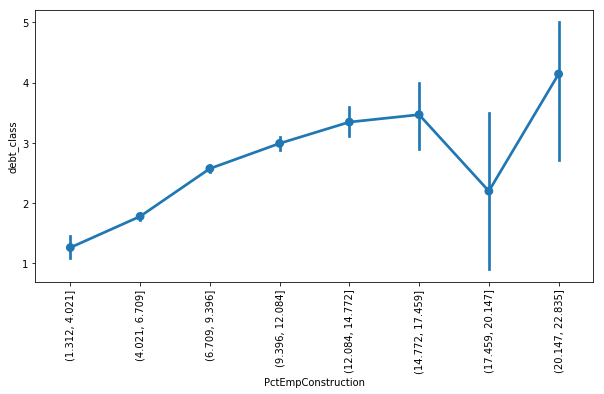

In [0]:
plt.figure(figsize = (10,5))
import seaborn as sns
sns.pointplot(x = pd.cut(train['PctEmpConstruction'],bins = 8), y = y_train)
plt.xticks(rotation = 90) 

# most variation in PctEmpConstruction lies in the 17.495-20.147 range; 
# this must be class where most values are 